In [4]:
%load_ext autoreload
%autoreload 2
from rdkit import Chem
from rdkit.Chem import Draw
from accfg import (AccFG, draw_mol_with_fgs, molimg, 
                   img_grid,  compare_mols, draw_compare_mols,
                   draw_RascalMCES, print_fg_tree)

from IPython.display import Image
import networkx as nx

afg = AccFG(print_load_info=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loaded 256 common functional groups. Loaded 195 heterocycle groups. Total 451 functional groups loaded.


# FG Extraction

In [8]:
smi = 'CN(C)/N=N/C1=C(NC=N1)C(=O)N'
fgs,fg_graph = afg.run(smi, show_atoms=True, show_graph=True)
print_fg_tree(fg_graph, fgs.keys(), show_atom_idx=True)

├──Primary amide: ((10, 12, 11),)
│  └──Carbonyl: ((10, 12),)
├──Triazene: ((1, 3, 4),)
└──imidazole: ((5, 9, 8, 7, 6),)
   ├──Hetero N basic H: ((8,),)
   └──Hetero N nonbasic: ((6,),)


In [9]:
print(fgs)

{'Primary amide': [(10, 12, 11)], 'Triazene': [(1, 3, 4)], 'imidazole': [(5, 9, 8, 7, 6)]}


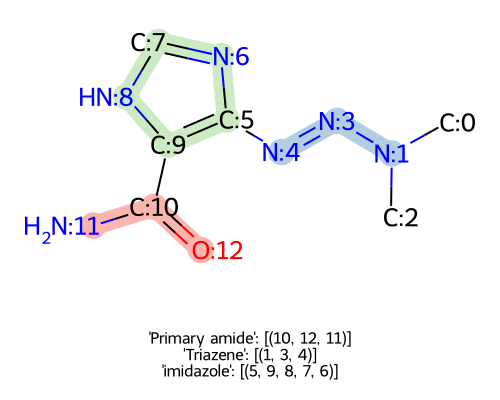

In [3]:
mol = Chem.MolFromSmiles('CN(C)/N=N/C1=C(NC=N1)C(=O)N')
mol_img = Draw.MolToImage(mol, size=(500,400))
# mol_img.save('mol.png', dpi=(300,300), transparent=True)
mol_fg_img = molimg(draw_mol_with_fgs('CN(C)/N=N/C1=C(NC=N1)C(=O)N', alpha=1))
# mol_fg_img.save('results/mol_fg_img.png', dpi=(300,300), transparent=True)
mol_fg_img

In [5]:
ertl_smis = [
    'Cc1nc(NS(=O)(=O)c2ccc(N)cc2)nc(C)c1', 
    'NC(=N)c1ccc(C=Cc2ccc(cc2O)C(=N)N)cc1', 
    'CC(=O)Nc1nnc(s1)S(=O)(=O)N',
    'NS(=O)(=O)c1cc2c(NCNS2(=O)=O)cc1Cl',
    'CNC1=Nc2ccc(Cl)cc2C(=N(=O)C1)c3ccccc3',
    'Cc1onc(c1C(=O)NC2C3SC(C)(C)C(N3C2=O)C(=O)O)c4ccccc4',
    'Clc1ccccc1C2=NCC(=O)Nc3ccc(cc23)N(=O)=O',
    'COc1cc(cc(C(=O)NCC2CCCN2CC=C)c1OC)S(=O)(=O)N',
    'Cc1ccc(Cl)c(Nc2ccccc2C(=O)O)c1Cl',
    'Clc1ccc2Oc3ccccc3N=C(N4CCNCC4)c2c1',
    'FC(F)(F)CN1C(=O)CN=C(c2ccccc2)c3cc(Cl)ccc13',
    'OCC1OC(CC1O)n2cnc3C(O)CNC=Nc32',
    'CCNC1CC(C)S(=O)(=O)c2sc(cc12)S(=O)(=O)N',
    'CC(O)C1C2C(C)C(=C(N2C1=O)C(=O)O)SC3CNC(C3)C(=O)N(C)C',
    'CC1CN(CC(C)N1)c2c(F)c(N)c3c(=O)c(cn(C4CC4)c3c2F)C(=O)O',
    'CC(=CCC1C(=O)N(N(C1=O)c2ccccc2)c3ccccc3)C',
    'Clc1ccc2N=C3NC(=O)CN3Cc2c1Cl',
    'CC(=O)NC1C(NC(=N)N)C=C(OC1C(O)C(O)CO)C(=O)O',
    'CC(O)C(O)C1CNc2nc(N)nc(O)c2N1',
    'NC1CCCCN(C1)c2c(Cl)cc3c(=O)c(cn(C4CC4)c3c2Cl)C(=O)O',
]

img_list = [molimg(draw_mol_with_fgs(smi, alpha=1)) for smi in ertl_smis]
mols_img = img_grid(img_list)
mols_img = mols_img.resize((6000, int(6000*mols_img.height/mols_img.width)))
mols_img
mols_img.save("results/result_on_ertl_mols.png",dpi = (300,300))

# Molecule Comparison

In [10]:
smi_1,smi_2 = ('CNC(=O)Cc1nc(-c2ccccc2)cs1','CCNCCc1nc2ccccc2s1')
compare_mols(smi_1, smi_2)

(([('Secondary amide', 1, [(2, 3, 1)]),
   ('Benzene', 1, [(8, 9, 10, 11, 12, 13)]),
   ('thiazole', 1, [(7, 14, 15, 5, 6)])],
  []),
 ([('Secondary aliphatic amine', 1, [(2,)]),
   ('benzo[d]thiazole', 1, [(9, 10, 11, 12, 13, 5, 6, 7, 8)])],
  [('C1 alkane', 2, [[1], [4]])]))

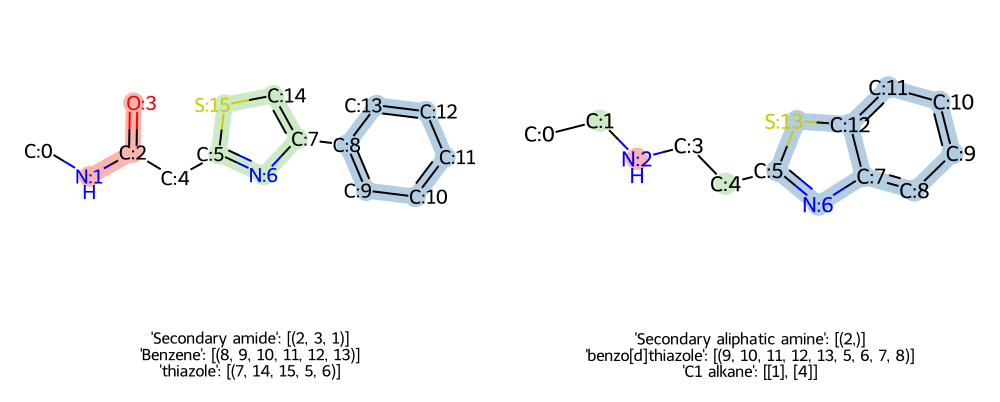

In [11]:
img = img_grid(draw_compare_mols(smi_1, smi_2),num_columns=2)
with open('results/compare_mols.png', 'wb') as f:
    img.save(f, format='PNG')
img

In [ ]:
img = draw_RascalMCES(smi_1, smi_2)
with open("results/result_on_RascalMCES.png", "wb") as f:
    f.write(img.data)

In [ ]:
mol_list = [Chem.MolFromSmiles(smi_1), Chem.MolFromSmiles(smi_2)]
mol_list_img = Draw.MolsToGridImage(mol_list, molsPerRow=2, subImgSize=(500,400), returnPNG=False)
mol_list_img.save('results/compare_mol_list.png', dpi=(300,300), transparent=True)

In [19]:
smiles_list =[('CC(=O)NC[C@H]1CN(c2ccc(-n3ccc(C#N)c3)c(F)c2)C(=O)O1','CC(=O)NC[C@H]1CN(c2ccc(N3CCN(c4ccc(C#N)cn4)CC3)c(F)c2)C(=O)O1'),
              ('Cc1cc2n[nH]c(=O)n2c2cc(-c3ccc[nH]3)ccc12', 'Cc1cc2n[nH]c(=O)n2c2ccccc12'), 
              ('CCN(C(=O)Cc1ccc(S(C)(=O)=O)cc1)C1CCN(CCC(c2ccccc2)c2ccccc2)CC1', 'CCN(C(=O)Cc1ccc(S(C)(=O)=O)cc1)C1CCN(CCC(c2ccccc2)N2CCN(c3ccccc3)CC2)CC1'),
              ('CCOc1cccc(Nc2nnc(C(=O)Nc3ccc(N4CCOCC4)nc3)o2)c1', 'O=C(Nc1ccc(N2CCOCC2)nc1)c1nnc(Nc2cccc(OCc3cccnc3)c2)o1'),]

for i, (smi_1, smi_2) in enumerate(smiles_list):
    print(compare_mols(smi_1, smi_2))
    img = draw_RascalMCES(smi_1, smi_2, subImgSize=(600,600))
    with open(f"results/mol_compare_result_on_RascalMCES_{i}.png", "wb") as f:
        f.write(img.data)
    compare_img = img_grid(draw_compare_mols(smi_1, smi_2, img_size=(1000,800)),num_columns=2, cell_height=800, cell_width=1000)
    with open(f"results/mol_compare_result_on_accfg_{i}.png", "wb") as f:
        compare_img.save(f, format='PNG', dpi=(300,300))


(([('1H-pyrrole', 1, [(14, 15, 18, 12, 13)])], []), ([('pyridine', 1, [(18, 17, 16, 23, 22, 19)]), ('piperazine', 1, [(13, 14, 15, 24, 25, 12)])], []))
(([('1H-pyrrole', 1, [(13, 14, 15, 16, 12)])], []), ([], []))
(([], []), ([('piperazine', 1, [(30, 31, 32, 39, 40, 29)])], []))
(([], [('C1 alkane', 1, [[0]])]), ([('pyridine', 1, [(28, 27, 32, 31, 30, 29)])], []))


# User-defined FGs

In [2]:
my_fgs_dict = {'Cephem': 'O=C(O)C1=CCS[C@@H]2CC(=O)N12', 'Thioguanine': 'Nc1nc(=S)c2[nH]cnc2[nH]1'}
my_afg = AccFG(user_defined_fgs=my_fgs_dict,print_load_info=True)

Loaded 256 common functional groups. Loaded 195 heterocycle groups. Loaded 2 user-defined functional groups. Total 453 functional groups loaded.


In [3]:
for name, smi in my_fgs_dict.items():
    mol = Chem.MolFromSmiles(smi)
    mol_img = Draw.MolToImage(mol, size=(500,400)) 
    mol_img.save(f'results/{name}.png', dpi=(300,300), transparent=True)

In [4]:
cephalosporin_C = 'CC(=O)OCC1=C(N2[C@@H]([C@@H](C2=O)NC(=O)CCC[C@H](C(=O)O)N)SC1)C(=O)O'
fgs,fg_graph = my_afg.run(cephalosporin_C, show_atoms=True, show_graph=True)
print_fg_tree(fg_graph, fgs.keys(), show_atom_idx=True)

├──Primary aliphatic amine: ((21,),)
├──Carboxylic acid: ((7, 8, 9), (22, 23, 24))
│  ├──Hydroxy: ((9,), (24,))
│  └──Carbonyl: ((1, 2), (7, 8), (11, 12), (15, 16), (22, 23))
├──Carboxylic ester: ((1, 2, 3, 4),)
│  ├──Carbonyl: ((1, 2), (7, 8), (11, 12), (15, 16), (22, 23))
│  └──oxy: ((3,),)
├──Secondary amide: ((15, 16, 14),)
│  └──Carbonyl: ((1, 2), (7, 8), (11, 12), (15, 16), (22, 23))
└──Cephem: ((8, 7, 9, 6, 5, 27, 26, 25, 13, 11, 12, 10),)
   ├──Alkene: ((5, 6),)
   ├──Dialkylthioether: ((26, 25, 27),)
   ├──Carboxylic acid: ((7, 8, 9), (22, 23, 24))
   │  ├──Hydroxy: ((9,), (24,))
   │  └──Carbonyl: ((1, 2), (7, 8), (11, 12), (15, 16), (22, 23))
   └──azetidin-2-one: ((12, 11, 13, 25, 10),)
      ├──Lactam: ((13, 11, 12, 10),)
      │  └──Amide: ((11, 12, 10), (15, 16, 14))
      │     └──Carbonyl: ((1, 2), (7, 8), (11, 12), (15, 16), (22, 23))
      └──azetidine: ((13, 11, 10, 25),)


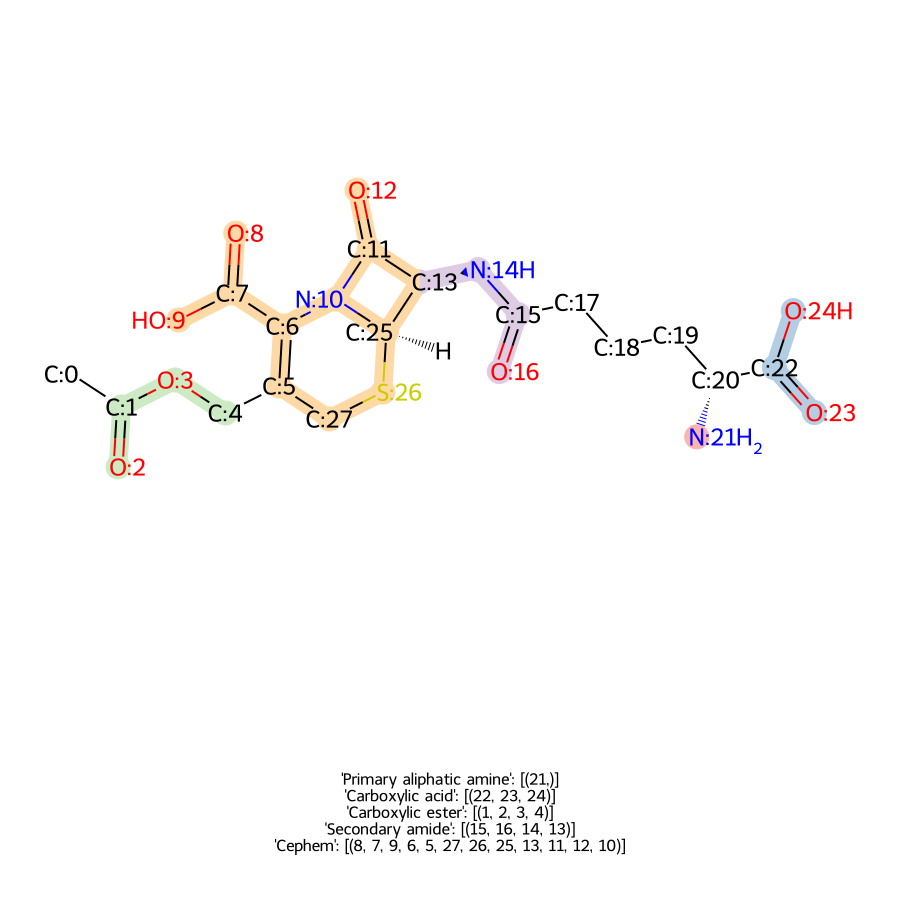

In [ ]:
img = molimg(draw_mol_with_fgs(cephalosporin_C, afg=my_afg, img_size=(900,900)))
# img.save('results/cephalosporin_C.png', dpi=(900,900))
img

In [6]:
mol_6_Thioguanosine = 'C1=NC2=C(N1[C@H]3[C@@H]([C@@H]([C@H](O3)CO)O)O)NC(=NC2=S)N'
fgs,fg_graph = my_afg.run(mol_6_Thioguanosine, show_atoms=True, show_graph=True)
print_fg_tree(fg_graph, fgs.keys(), show_atom_idx=True)

├──Primary hydroxyl: ((13, 12),)
│  └──Hydroxy: ((13,), (15,), (17,))
├──1,2-Diol: ((15, 14, 16, 17),)
│  └──Secondary hydroxyl: ((15, 14), (17, 16))
│     └──Hydroxy: ((13,), (15,), (17,))
├──tetrahydrofuran: ((14, 16, 9, 10, 11),)
│  ├──Dialkylether: ((10, 9, 11),)
│  ├──Sugar pattern 1: ((10,),)
│  └──oxy: ((10,),)
└──Thioguanine: ((0, 1, 2, 3, 4, 5, 6, 7, 8, 18, 19),)
   ├──Primary aromatic amine: ((0, 1),)
   ├──Thioarene: ((3, 4),)
   └──purine: ((1, 2, 3, 5, 6, 7, 8, 18, 19),)
      ├──imidazole: ((5, 18, 8, 7, 6),)
      │  ├──Hetero N basic no H: ((8,),)
      │  └──Hetero N nonbasic: ((2,), (6,))
      └──pyrimidine: ((5, 3, 2, 1, 19, 18),)
         ├──Hetero N basic H: ((19,),)
         └──Hetero N nonbasic: ((2,), (6,))


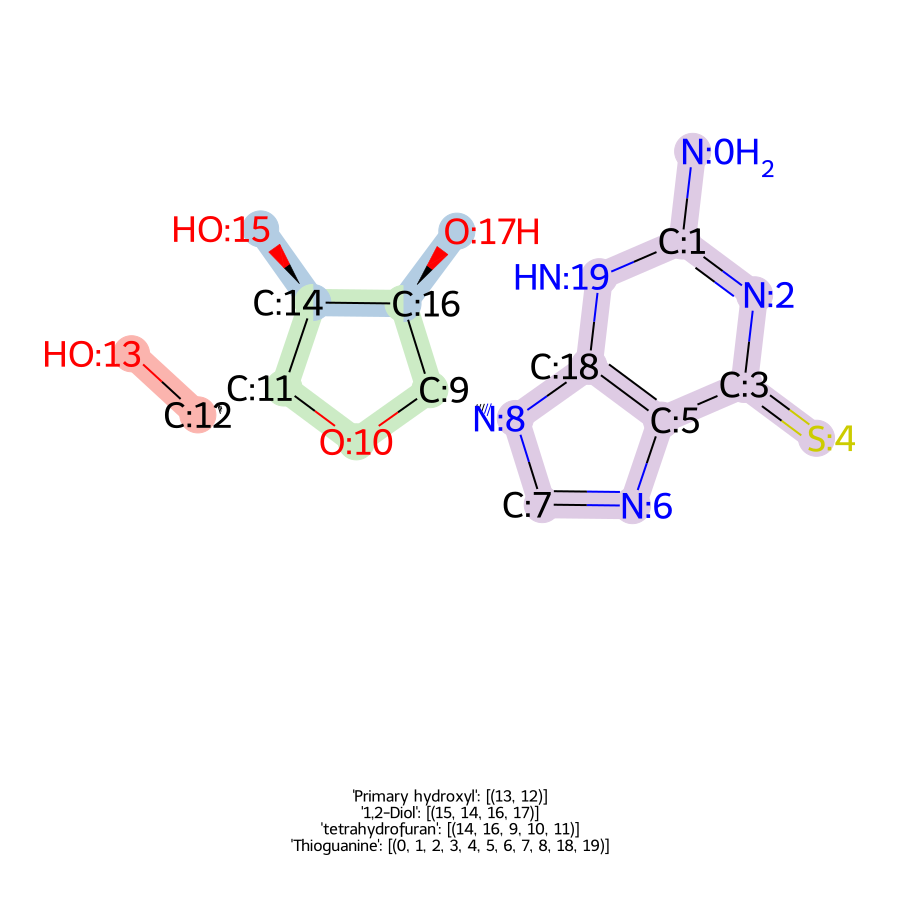

In [7]:
img = molimg(draw_mol_with_fgs(mol_6_Thioguanosine, afg=my_afg, img_size=(900,900)))
img.save('results/mol_6_Thioguanosine.png', dpi=(900,900))
img